<a href="https://colab.research.google.com/github/tusker4/Sesac_Saltlux_DeepLearning/blob/main/11_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%B9%84%EC%A0%84_%EA%B0%9D%EC%B2%B4%ED%83%90%EC%A7%80_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 객체 탐지 (Object Detection)

- 한장의 이미지(혹은 영상 프레임)에서 객체(사물 혹은 모델이 인식하는것으로 학습한대상)와 그 경계 상자(Bounding Box)를 탐지
    - 보안
        - CCTV, 영상분석, 관제
    - 엔터
        - 동영상생성, 뮤비생성,영상편집
    - 자율주행
        - 타 자동차, 보행자, 건물, 신호등, 차선
    - 의료분야
        - 방사선 사진, CT, MRI등 종양등 탐지
    - 제조
        - 스마트팩토리, 로봇 조립
        
- 입력과 출력
    - 입력
        - 이미지, 영상
    - 출력
        - 이미지위에 바운딩박스 + 객체명(라벨)
        - 동영사위에 실시간 바운딩방스+객체명
        - 예측 신뢰도 표현

# 모델-객체탐지 모델역사

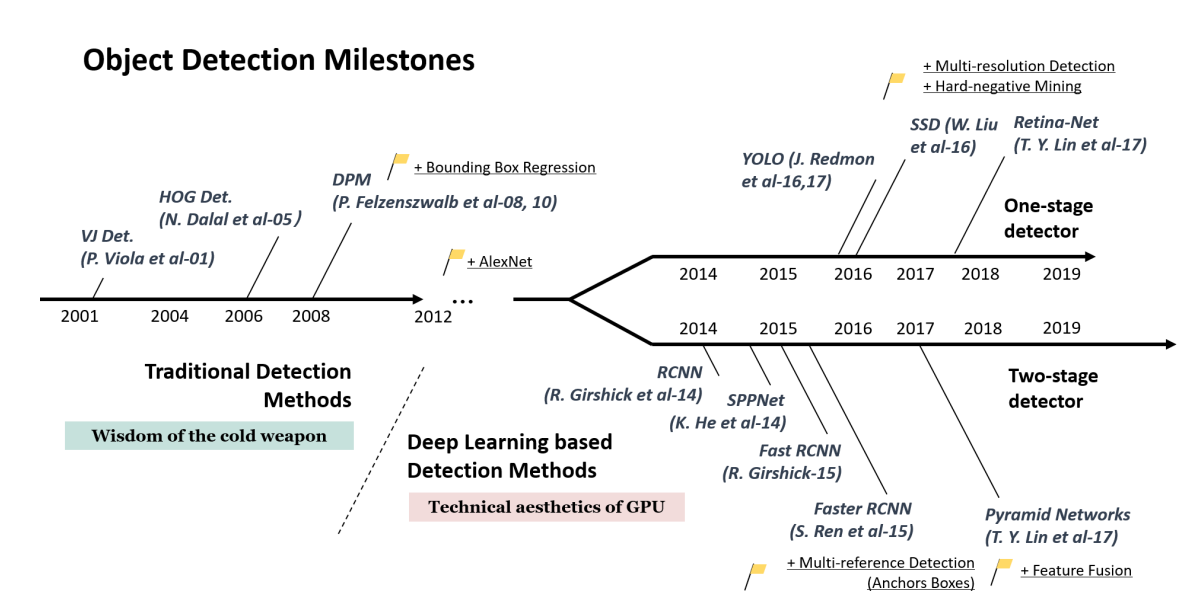

In [ ]:
from IPython.display import Image

Image('/content/drive/MyDrive/SeSAC/share/딥러닝/img/객체탐지.png')

- Yolo
    - Yolo v1~**v3** : 개발 완료, 프로젝트 종료
        - https://arxiv.org/abs/1804.02767
        - https://pjreddie.com/darknet/yolo/
    - v4 ~ v7,v8 ~   : 원 개발자가 아닌 다른 팀에서 개발
    - 구조
        - 백본 모델 기반
            - CNN, ResNet

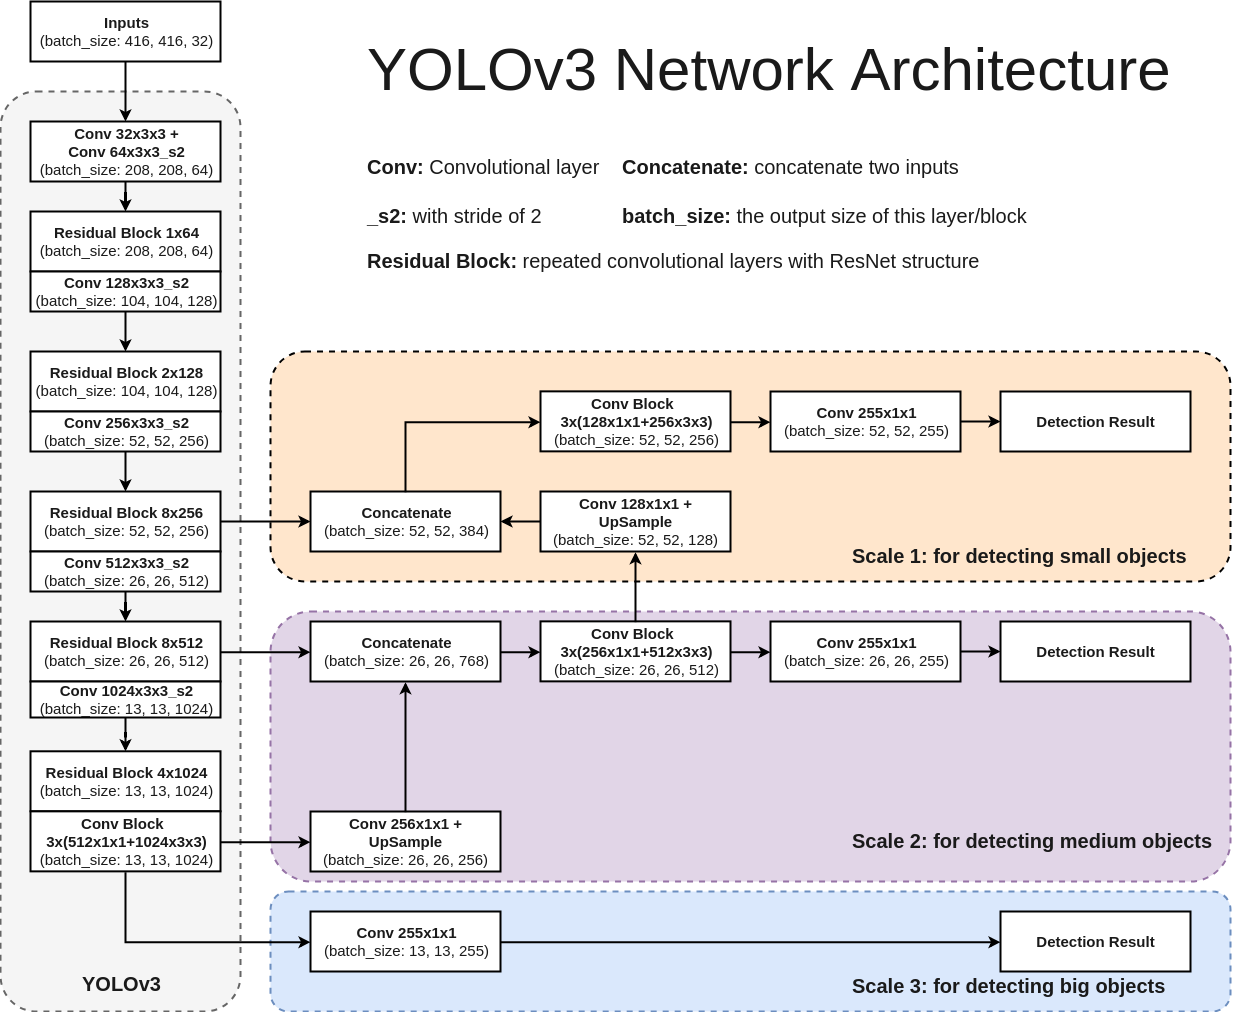

In [ ]:
Image('/content/drive/MyDrive/SeSAC/share/딥러닝/img/yolov3_구조.png')

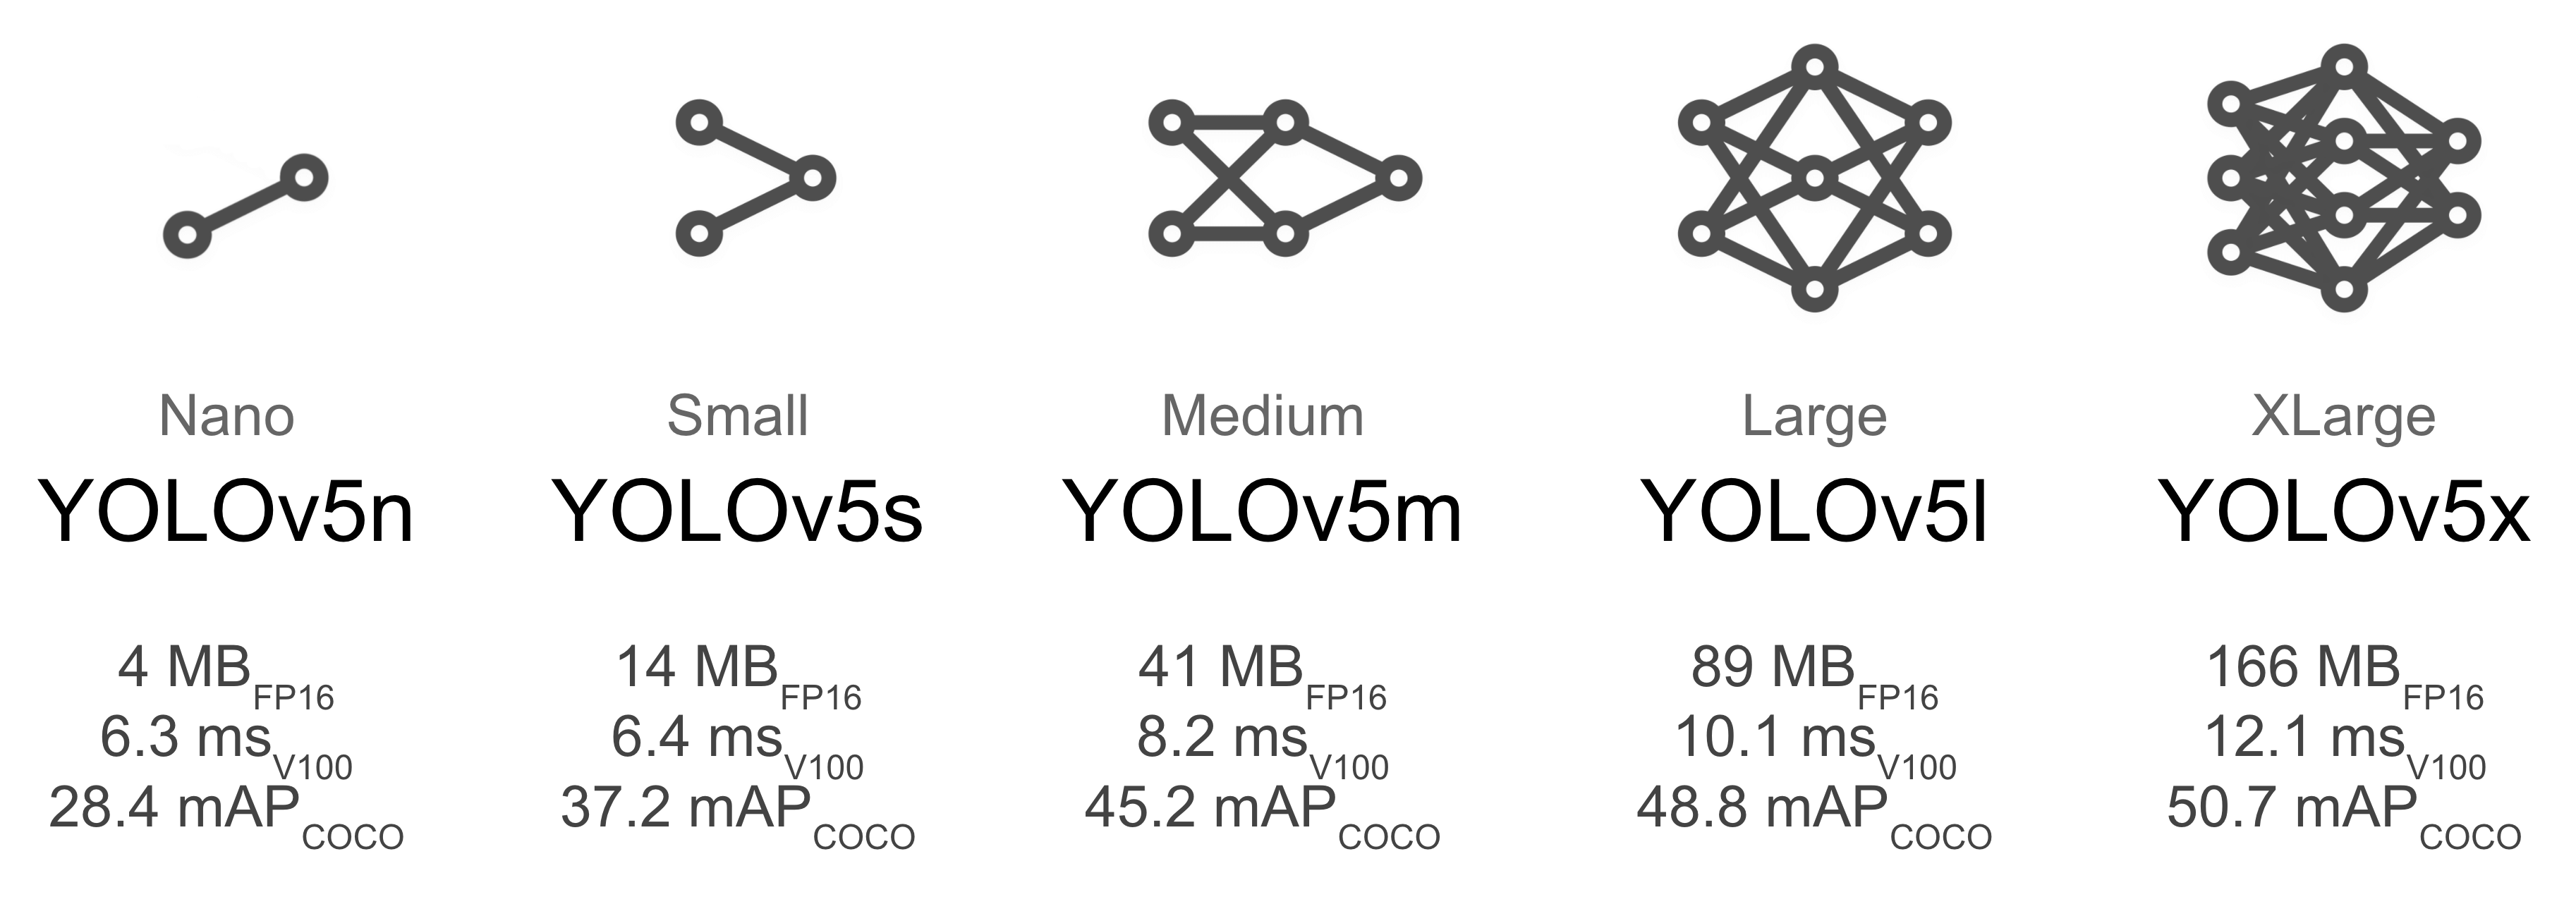

In [ ]:
Image('/content/drive/MyDrive/SeSAC/share/딥러닝/img/yolo_model_comparison.png')
# 경량 모델 -> 가볍고, 빠른탐지, 정확도는 상대적으로 떨어짐
# 고성는 모델 -> 반대 성향

# Torch hub를 이용한 yolov5 모델 사용

- 전이학습 기반
    - 제로샷 러닝 기반 진행
- https://pytorch.org/hub/

In [ ]:
!pip install -qU ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.2/645.2 kB 7.1 MB/s eta 0:00:00


In [ ]:
# 1. 모듈 가져오기
import torch

# 2. 토치 허브를 통해서 모델 획득, 다운로드
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# 3. 데이터Images : (720, 1280)
imgs = ['https://ultralytics.com/images/zidane.jpg']  # batch of images

# 4. 객체 탐지 진행 -> 1차원 구조
results = model(imgs)

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
requirements: Ultralytics requirements ['gitpython>=3.1.30', 'Pillow>=10.0.1'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.

UnidentifiedImageError: ignored

In [ ]:
# Results
results.print()
# 사람, 타이 2개 탐지

In [ ]:
# 결과 저장
results.save()  # or .show()

In [ ]:
# 바운딩 박스 좌표
results.xyxy[0]  # img1 predictions (tensor)
results.pandas().xyxy[0]  # img1 predictions (pandas)
# 바운딩박스 좌표, 정확도, 분류번호, 분류명

- 제로샷 러닝의 단점
    - 기존 모델이 학습한 분류 대상 이외의 객체들은 탐지 불가
    - 해결
        - 추가하고 싶은 객체를 추가 학습하여 모델의 분류 개수를 증가
        - 미세조정, **파인튜닝**에서 데이터를 일부(대량) 넣어서 학습 방식
            - 약간의 데이터 => 퓨샷 러닝
            - 새로 학습하는 대상만 파악하게 파인튜닝도 가능
                - GPT에서 사용하는 방식
                    - 특정 주제를 가진 텍스트

# 전이학습-파인튜닝적용-커스텀데이터사용-yolov5

- 나만의 데이터 사용
    - roboflow
        - 직접 이미지 수집 => 등록 => 라벨링
        - 실습상 사용가능한 공개된 이미지 세트를 사용
            - smoke 사용(연기 => 화재, 담배,..)
            - 도로 크렉
- 모델
    - 사전학습된 모델 사용
        - pretrained yolov5 model (pyTorch버전)
    - 학습은 GPU로 진행

## yolov5 세팅

In [ ]:
# yolov5 git 다운로드
!git clone https://github.com/ultralytics/yolov5/

Cloning into 'yolov5'...
remote: Enumerating objects: 16052, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 16052 (delta 50), reused 53 (delta 27), pack-reused 15967
Receiving objects: 100% (16052/16052), 14.68 MiB | 28.41 MiB/s, done.
Resolving deltas: 100% (11012/11012), done.


- 주요 파일
    - detect.py : 객체 탐지시 사용
    - export.py : 모델을 타형식으로 내보낼때
        - tensorflow, onnx, mxnet,...
    - train.py : 훈련용, 새로운 데이터를 넣어서 학습시 사용

In [ ]:
# 현재 위치
!pwd

/content


In [ ]:
# 위치 이동 => 현재 위치가 변경됨(명령이 유지되는 방식 %, !그 시점만 수행되는 방식)
%cd /content/yolov5

/content/yolov5


In [ ]:
!pwd

/content/yolov5


In [ ]:
!ls -al

total 368
drwxr-xr-x 9 root root  4096 Nov  6 01:54 .
drwxr-xr-x 1 root root  4096 Nov  6 01:54 ..
-rw-r--r-- 1 root root  8009 Nov  6 01:54 benchmarks.py
-rw-r--r-- 1 root root   393 Nov  6 01:54 CITATION.cff
drwxr-xr-x 2 root root  4096 Nov  6 01:54 classify
-rw-r--r-- 1 root root  5009 Nov  6 01:54 CONTRIBUTING.md
drwxr-xr-x 5 root root  4096 Nov  6 01:54 data
-rw-r--r-- 1 root root 15364 Nov  6 01:54 detect.py
-rw-r--r-- 1 root root  3701 Nov  6 01:54 .dockerignore
-rw-r--r-- 1 root root 41275 Nov  6 01:54 export.py
drwxr-xr-x 8 root root  4096 Nov  6 01:54 .git
-rw-r--r-- 1 root root    75 Nov  6 01:54 .gitattributes
drwxr-xr-x 4 root root  4096 Nov  6 01:54 .github
-rwxr-xr-x 1 root root  3998 Nov  6 01:54 .gitignore
-rw-r--r-- 1 root root  7769 Nov  6 01:54 hubconf.py
-rw-r--r-- 1 root root 34523 Nov  6 01:54 LICENSE
drwxr-xr-x 4 root root  4096 Nov  6 01:54 models
-rw-r--r-- 1 root root  1815 Nov  6 01:54 .pre-commit-config.yaml
-rw-r--r-- 1 root root 41591 Nov  6 01:54 README.

In [ ]:
# 필요 패키지 설치
!pip install -qr requirements.txt

## 데이터 획득

- roboflow에서 획득
    - 도로위에 홀 데이터 셋
        - https://universe.roboflow.com/brad-dwyer/pothole-voxrl/dataset/1
            - !curl -L "https://universe.roboflow.com/ds/Kj2IJUSFaL?key=AZ7LjB0NFu" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
    - 연기
        - !curl -L "https://universe.roboflow.com/ds/xJDnTzTWUQ?key=Tq7M8LIeOy" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
%cd ..

/content


In [ ]:
'''
    - train
    - test
    - vaild
    - README.datasets.txt
    - README.roboflow.txt
    - data.yaml
        - 훈련, 테스트 데이터 상대 경로(수정가능)
        - 분류라벨값, 이름
'''
!curl -L "https://universe.roboflow.com/ds/Kj2IJUSFaL?key=AZ7LjB0NFu" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   2712      0 --:--:-- --:--:-- --:--:--  2705
100 46.0M  100 46.0M    0     0  48.6M      0 --:--:-- --:--:-- --:--:-- 48.6M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/img-105_jpg.rf.3fe9dff3d1631e79ecb480ff403bcb86.jpg  
 extracting: test/images/img-107_jpg.rf.2e40485785f6e5e2efec404301b235c2.jpg  
 extracting: test/images/img-146_jpg.rf.61be25b3053a51f622a244980545df2b.jpg  
 extracting: test/images/img-161_jpg.rf.211541e7178a4a93ec0680f26b905427.jpg  
 extracting: test/images/img-168_jpg.rf.af3590e07b06b43e91fa53990ff94af3.jpg  
 extracting: test/images/img-179_jpg.rf.8632eb0d9b75fefe144829e67b75015a.jpg  
 extracting: test/images/img

## 학습

In [ ]:
'''
 --img    : 훈련시킬 이미지의 가로길이 -> 지정 조정되서 처리
 --batch  : 1회 학습시 사용할 데이터량 -> gpu 메모 한계 내 처리
 --epochs : 학습 세대수
 --data   : 학습, 검증용 데이터 메타 정보 -> data.yaml
 --weights : 가중치를 가진 모델(pt)
 --name   : 학습 진행후 결과를 담을 이름 -> 해당이름으로 폴더가 생성
 --cfg    : 모델의 구성정보
'''
!python /content/yolov5/train.py --img 416 --batch 20 --epochs 10 \
        --data /content/data.yaml --weights /content/yolov5/yolov5s.pt \
        --name res-hole --cfg /content/yolov5/models/yolov5s.yaml

        # yaml : 도커에서 주로 사용

2023-11-06 01:54:47.078880: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-06 01:54:47.078941: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-06 01:54:47.078987: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=/content/yolov5/yolov5s.pt, cfg=/content/yolov5/models/yolov5s.yaml, data=/content/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=20, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, si

# 추론

In [ ]:
# conf :0.1 정확도만 나와도 출력
# 데이터를 넣어서 객체 탐지 확인
!python /content/yolov5/detect.py \
       --weight /content/yolov5/runs/train/res-hole/weights/best.pt \
       --img 416 --conf 0.1 --source /content/valid/images


detect: weights=['/content/yolov5/runs/train/res-hole/weights/best.pt'], source=/content/valid/images, data=yolov5/data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-238-gd5d514e Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/133 /content/valid/images/img-104_jpg.rf.687b8858a9a79e92ea4b11024eafee62.jpg: 416x416 8 potholes, 7.4ms
image 2/133 /content/valid/images/img-106_jpg.rf.4e4d5cc9b01160ccfb18c911b34f3f98.jpg: 416x416 5 potholes, 9.1ms
image 3/133 /content/valid/images/img-112_jpg.rf.f2165fc7173878a7c

# yolov3 다운로드
- 가중치 파일  (yolov3.weights)
    - https://pjreddie.com/media/files/yolov3.weights

- 모델구성정보 (yolov3.cfg)
    - https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
    
- 초기모델의 학습시 사용한  class 값 ()
    - https://github.com/pjreddie/darknet/blob/master/data/coco.names
    - coco_labels.txt 저장